In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools  #for pormutation and combinaation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
pip install scipy==1.7.3

In [2]:
series = read_csv('water.csv', header=0, index_col=0, parse_dates=True)

In [3]:
series

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


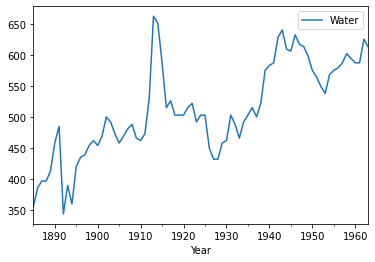

In [4]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Water'}>]], dtype=object)

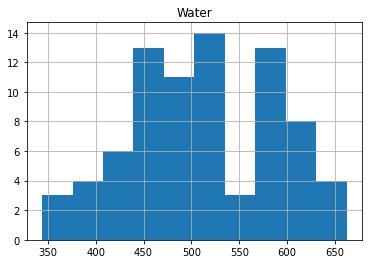

In [5]:
series.hist()

<AxesSubplot:ylabel='Density'>

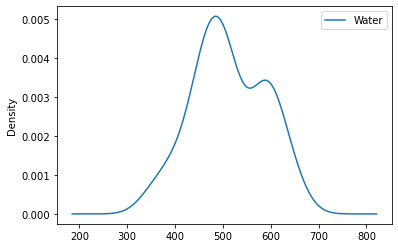

In [6]:
series.plot(kind='kde')

In [7]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 69, Validation 10


#### Persistence/ Base model

In [8]:
''' evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]'''


" evaluate a persistence model\nfrom pandas import read_csv\nfrom sklearn.metrics import mean_squared_error\nfrom math import sqrt\n# load data\ntrain = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)\n# prepare data\nX = train.values\nX = X.astype('float32')\ntrain_size = int(len(X) * 0.50)\ntrain, test = X[0:train_size], X[train_size:]"

In [9]:
'''walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)'''

"walk-forward validation\nhistory = [x for x in train]\npredictions = list()\nfor i in range(len(test)):\n    yhat = history[-1]\n    predictions.append(yhat)\n# observation\n    obs = test[i]\n    history.append(obs)\n    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))\n# report performance\nrmse = sqrt(mean_squared_error(test, predictions))\nprint('RMSE: %.3f' % rmse)"

#### ARIMA Hyperparameters

In [10]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]  # all the training data stored inside a list 
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [11]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [12]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


#### Build Model based on the optimized values

In [13]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [14]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

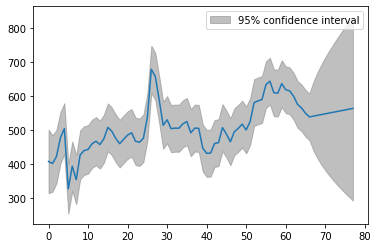

In [20]:
# fit model
from statsmodels.graphics.tsaplots import plot_predict

model=sm.tsa.arima.ARIMA(X, order=(0,2,2))
#model = ARIMA(X, order=(0,2,2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]


plot_predict(model_fit,2, 79)
plt.show()

In [22]:
#Error on the test data
#val=pd.read_csv('validation.csv',header=None)
#rmse = sqrt(mean_squared_error(val[1], forecast))
#rmse

#### Combine train and test data and build final model

In [23]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [25]:
model=sm.tsa.arima.ARIMA(X, order=(3,1,0))
model_fit = model.fit()

In [26]:
#model = ARIMA(X, order=(3,1,0))
#model_fit = model.fit()

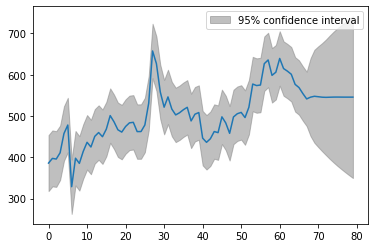

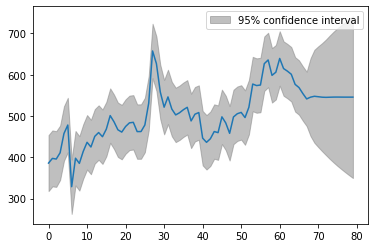

In [29]:
forecast=model_fit.forecast(steps=10)[0]
plot_predict(model_fit,1,80)

In [30]:
forecast

541.4325604584538

In [ ]:
import statsmodels

In [ ]:
statsmodels.__version__


In [ ]:
pip install statsmodels==0.6.1